Performing (1+1)-GA


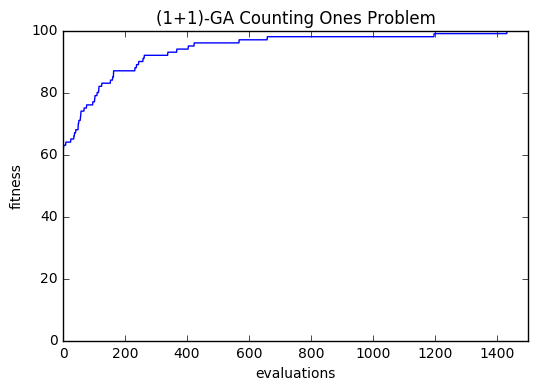

Best bit sequence: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Best fitness: 100


In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random
import copy

def generate_random_bit_array(length):
    return np.random.randint(2, size=(length,))

def counting_ones(arr):
    return np.sum(arr)

def multi_flip_binary(arr, probability):
    for idx, val in enumerate(arr):
        if random.random() < probability:
            arr[idx] = not arr[idx]
    return arr        


def genetic_algorithm(objective_function, array_length, evaluations):
    print('Performing (1+1)-GA')
    
    # (a) Generate random bitarray of length 'bitarray_length'
    best_bitarray = generate_random_bit_array(array_length)
    # Get the fitness of the current solution
    best_fitness = objective_function(best_bitarray)
    fitness_history = [best_fitness]
    
    # (d)
    for x in range(0, evaluations):
        # (b) Create a copy of this bitarray and invert each bit with probability 1/n
        best_bitarray_copy = copy.deepcopy(best_bitarray)
        mutated_bitarray = multi_flip_binary(best_bitarray_copy, 1/array_length)
        mutated_bitarray_fitness = objective_function(mutated_bitarray)
        
        # (c) take the mutant if it is closer to the goal sequence
        if mutated_bitarray_fitness >= best_fitness:
            best_bitarray = mutated_bitarray
            best_fitness = mutated_bitarray_fitness
        
        fitness_history.append(best_fitness)
        
    axes = plt.gca()
    axes.set_xlim([0,evaluations])
    axes.set_ylim([0,array_length])    
    plt.plot(fitness_history)
    plt.xlabel('evaluations')
    plt.ylabel('fitness')
    plt.title('(1+1)-GA Counting Ones Problem')

    plt.show()
    return [best_bitarray, best_fitness]
    

result = genetic_algorithm(counting_ones, 100, 1500)
print("Best bit sequence: " + str(result[0]))
print("Best fitness: " + str(result[1]))
